## Importar librerias necesarias

In [101]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport


## Importar dataset del DataSet Internet

In [102]:


# Cargar el archivo Excel
file_path = '../datasets/Internet.xlsx'
file_path_tv = '../datasets/Television.xlsx'
data = pd.ExcelFile(file_path)

# Mostrar las pestañas del archivo Excel
sheet_names = data.sheet_names
sheet_names


['Velocidad_sin_Rangos',
 'Velocidad % por prov',
 'Totales VMD',
 'Accesos_tecnologia_localidad',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Penetracion-poblacion',
 'Penetracion-hogares',
 'Penetracion-totales',
 'Totales Accesos por velocidad',
 'Accesos por velocidad',
 'Ingresos']

> Se importa el dataset y se hace una impresion de todas las pestañas del archivo.

### Nota:

<p> se reqalizo una revision preliminar del los datos a traves de excel y por la cantidad de de valores faltantes existentes en el la seccion 'Acc_vel_loc_sinrangos' se decidio dejar fuera del registro.</p>

In [103]:
for sheet in sheet_names:
    if sheet == 'Acc_vel_loc_sinrangos':
        continue
    df = pd.read_excel(file_path, sheet_name=sheet)
    print(f"--- {sheet} ---")
    print(df.head())
    print("\n")

--- Velocidad_sin_Rangos ---
      Año  Trimestre        Provincia    Otros  0,256 Mbps  0,375 Mbps  \
0  2023.0        4.0     Buenos Aires  93351.0        19.0         0.0   
1  2023.0        4.0  Capital Federal      0.0        31.0         0.0   
2  2023.0        4.0        Catamarca     77.0         0.0         0.0   
3  2023.0        4.0            Chaco   4040.0         0.0         0.0   
4  2023.0        4.0           Chubut  16589.0         8.0         0.0   

   0,625 Mbps  0,5 Mbps  0,512 Mbps  0,75 Mbps  ...  2048 Mbps  2529 Mbps  \
0         0.0   26703.0       187.0     4611.0  ...        0.0        0.0   
1         0.0     451.0        34.0     1307.0  ...        0.0        0.0   
2         0.0      34.0        37.0        0.0  ...        0.0        0.0   
3         0.0     234.0         2.0        0.0  ...        0.0        0.0   
4         0.0      69.0        34.0      836.0  ...        0.0        0.0   

   3072 Mbps  4000 Mbps  5000 Mbps  5125 Mbps  6000 Mbps  7000 

> Se uso el metodo head(5) de pandas para revisar a detalle como estan compuestas la columnas de datos en cada tabla con el fin de tener una idea de como pueden relacionarse entre ellos.

In [104]:
nulos = {}
for sheet in sheet_names:
    data = pd.read_excel(file_path, sheet_name=sheet)
    nulos[sheet] = data.isnull().sum()

nulos

{'Velocidad_sin_Rangos': Año           1
 Trimestre     1
 Provincia     1
 Otros         1
 0,256 Mbps    1
              ..
 5125 Mbps     1
 6000 Mbps     1
 7000 Mbps     1
 8000 Mbps     1
 10000 Mbps    1
 Length: 193, dtype: int64,
 'Velocidad % por prov': Año                       0
 Trimestre                 0
 Provincia                 0
 Mbps (Media de bajada)    0
 dtype: int64,
 'Totales VMD': Año                       0
 Trimestre                 0
 Mbps (Media de bajada)    0
 Trimestre.1               0
 dtype: int64,
 'Accesos_tecnologia_localidad': Provincia        0
 Partido          0
 Localidad        0
 Link Indec       0
 ADSL             0
 CABLEMODEM       0
 DIAL UP          0
 FIBRA OPTICA     0
 OTROS            0
 SATELITAL        0
 WIMAX            0
 WIRELESS         0
 Total general    0
 dtype: int64,
 'Totales Accesos Por Tecnología': Año             0
 Trimestre       0
 ADSL            0
 Cablemodem      0
 Fibra óptica    0
 Wireless        0
 Otro

>  Se hace una revision simple del cada tabla para evaluar la presencia de datos nulos arrojando el siguiente resultado
- Accesos Por Tecnología : 2 filas con presencia de datos nulos.

- Dial-BAf : 2 filas con presencia de datos nulos.

- Accesos por velocidad : 6 filas con presencia de datos nulos.

In [105]:
import re

regex = r'[^\w\s]'  # Detecta caracteres especiales
regex_num = r'\d'   # Detecta números

# Función para verificar caracteres especiales
def has_special_chars_or_numbers(row):
    return bool(re.search(regex, row)) or bool(re.search(regex_num, row))

for sheet in sheet_names:
    data = pd.read_excel(file_path, sheet_name=sheet)
    if 'Provincia' in data.columns:
        data = data.dropna() # elimina valor nulo para evirtar error

        # Aplicar la función a cada fila del DataFrame
        data['contains_special_or_numeric'] = data['Provincia'].apply(has_special_chars_or_numbers)
        data_ = data[data['contains_special_or_numeric']==True]
        if data_.empty:
            print(f'Nada en {sheet}')
        else:
            print(data_)


Nada en Velocidad_sin_Rangos
Nada en Velocidad % por prov
Nada en Accesos_tecnologia_localidad
Nada en Accesos Por Tecnología
Nada en Dial-BAf
Nada en Penetracion-poblacion
Nada en Penetracion-hogares
Nada en Accesos por velocidad


> Se realiza una verificacion rapida de la homogneidad de las columnas Provincias dentro de las tablas con el fin de corregir posibles errores.

## Importar datos.


In [106]:
data_acc_por_tec= pd.read_excel(file_path, sheet_name='Accesos Por Tecnología')
data_pen_hog= pd.read_excel(file_path, sheet_name='Penetracion-hogares')
data_tota_pen= pd.read_excel(file_path, sheet_name='Penetracion-totales')
data_total_acc_vel= pd.read_excel(file_path, sheet_name='Totales Accesos por velocidad')
data_acc_por_vel= pd.read_excel(file_path, sheet_name='Accesos por velocidad')
data_ingresos= pd.read_excel(file_path, sheet_name='Ingresos')

# data Tv

data_tv = pd.read_excel(file_path_tv, sheet_name='Penetracion_totales_TV')

## Analisis de la tabla Penetracion-totales

In [ ]:
data_pen_hog

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2023,4,Buenos Aires,80.960000
1,2023,4,Capital Federal,117.020000
2,2023,4,Catamarca,68.630000
3,2023,4,Chaco,44.350000
4,2023,4,Chubut,84.960000
...,...,...,...,...
955,2014,1,Santa Cruz,28.939093
956,2014,1,Santa Fe,47.847663
957,2014,1,Santiago Del Estero,16.309924
958,2014,1,Tierra Del Fuego,63.965926


In [127]:
data_tota_pen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           40 non-null     int64  
 1   Trimestre                     40 non-null     int64  
 2   Accesos por cada 100 hogares  40 non-null     float64
 3   Accesos por cada 100 hab      40 non-null     float64
 4   Periodo                       40 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB


In [107]:
data_pen_hog.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,51.662405
std,2.873778,1.118617,23.898192
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.750000,32.856870
50%,2018.500000,2.500000,48.817167
75%,2021.000000,3.250000,65.116858
max,2023.000000,4.000000,124.061394


> visializando los datos y como estan compuestos se decide a trabajar en base a la evaluacion de las siguientes tres tablas:
- Accesos por tecnologia.
- Penetracion-hogares(KPI principal pedido por la empresa).
- Penetracion_totales_TV(se encuentra en la el el archivo excel 'Television.xslx').

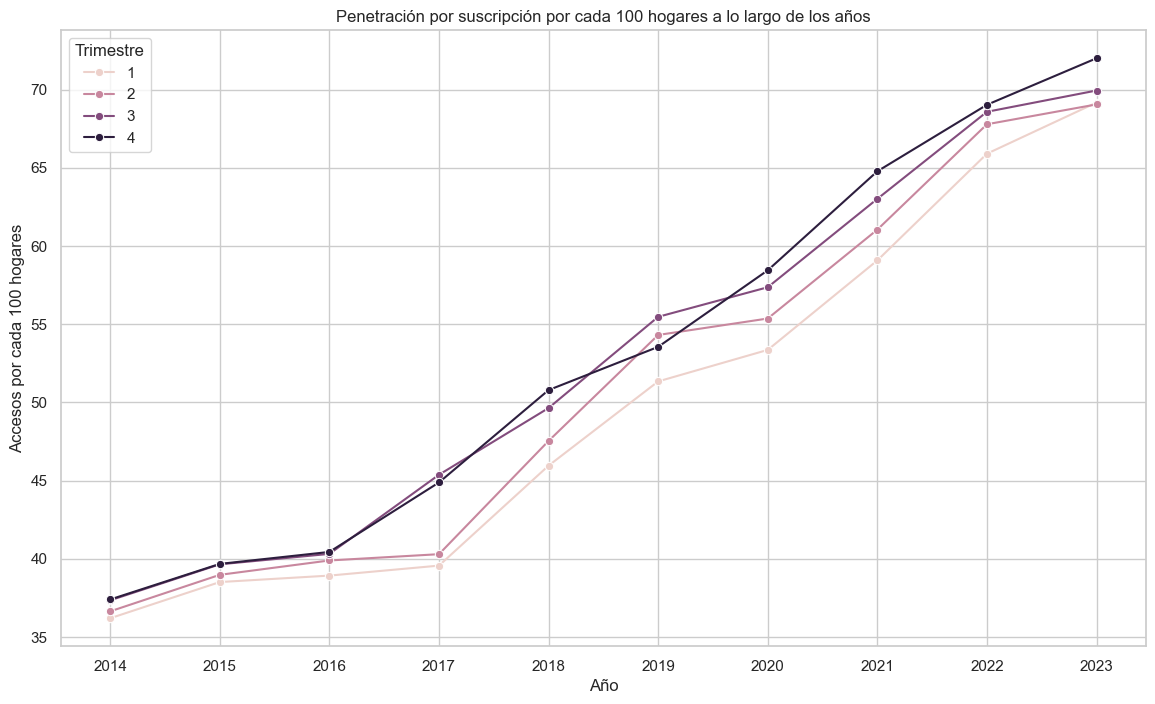

In [109]:
ho_grouped = data_pen_hog.groupby(['Año', 'Trimestre'])['Accesos por cada 100 hogares'].mean().reset_index()

# Gráfico de líneas
plt.figure(figsize=(14, 8))
sns.lineplot(data=ho_grouped, x='Año', y='Accesos por cada 100 hogares', marker='o', hue='Trimestre')

plt.title('Penetración por suscripción por cada 100 hogares a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(ho_grouped['Año'].unique())
plt.grid(True)
plt.legend(title='Trimestre')
plt.show()

> En una evaluacion general se puede considerar el acceso a los hogares se ha mantenido en un aumento progresivo a traves de la ultima decada.

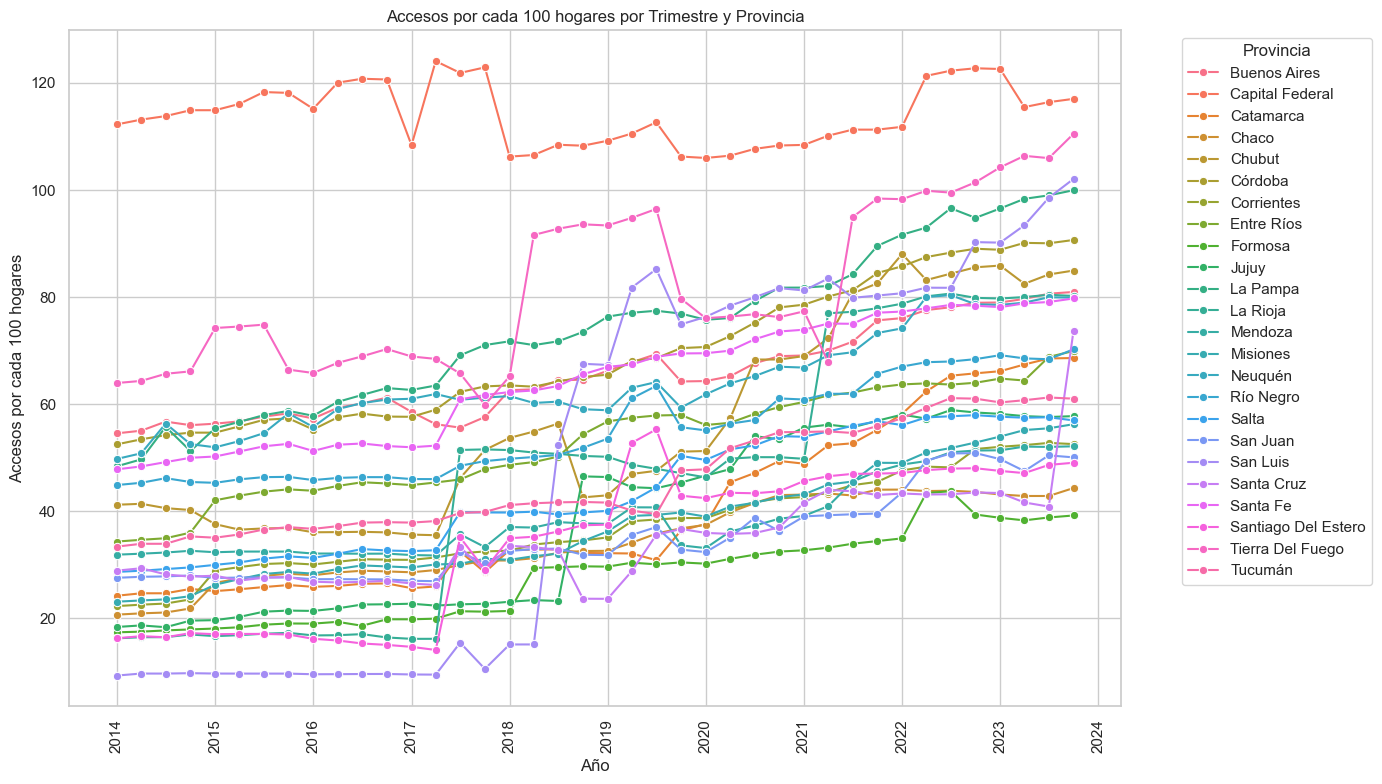

In [110]:
# Crear una función para convertir año y trimestre a una fecha
def convertir_a_date(fila):
    año = fila['Año']
    trimestre = fila['Trimestre']
    if trimestre == 1:
        return pd.Timestamp(f'{año}-01-01')
    elif trimestre == 2:
        return pd.Timestamp(f'{año}-04-01')
    elif trimestre == 3:
        return pd.Timestamp(f'{año}-07-01')
    elif trimestre == 4:
        return pd.Timestamp(f'{año}-10-01')

# Aplicar la función para crear la columna 'Fecha'
data_pen_hog['Fecha'] = data_pen_hog.apply(convertir_a_date, axis=1)


# Crear la gráfica con Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_pen_hog, x='Fecha', y='Accesos por cada 100 hogares', hue='Provincia', marker='o')

# Configurar la gráfica
plt.title('Accesos por cada 100 hogares por Trimestre y Provincia')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> En el detalle de los datos por provincia se pueden apreciar los diferentes comportamientos segun sea la provincia, destacando en ella dos en particular, en este caso se tendria la region capital(comportamiento comun), sin embargo quien mas destacaria en este punto seria la provincia de san luis que para mediados del 2017 inicio un crecimiento lento con pasando de aproximadamente un promedio de 10 hogares de manera sostenida desde el 2014 y terminar el año 2017 rozando los 20, pero para el año del 2018 durante su segundo cuarto la provincia de san luis inicia un crecimiento exponencial que decrece solo en el 2019 entre su segundo y tercer cuarto (posiblemente a causa de la pandemia), recupera su linea de crecimiento pero de manera mas lenta para culminar el ultimo cuarto del 2023 con una media que supera el 100.

C:\Users\Rhamer\AppData\Local\Temp\ipykernel_11128\1278652065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['Fecha'] = data_.apply(convertir_a_date, axis=1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


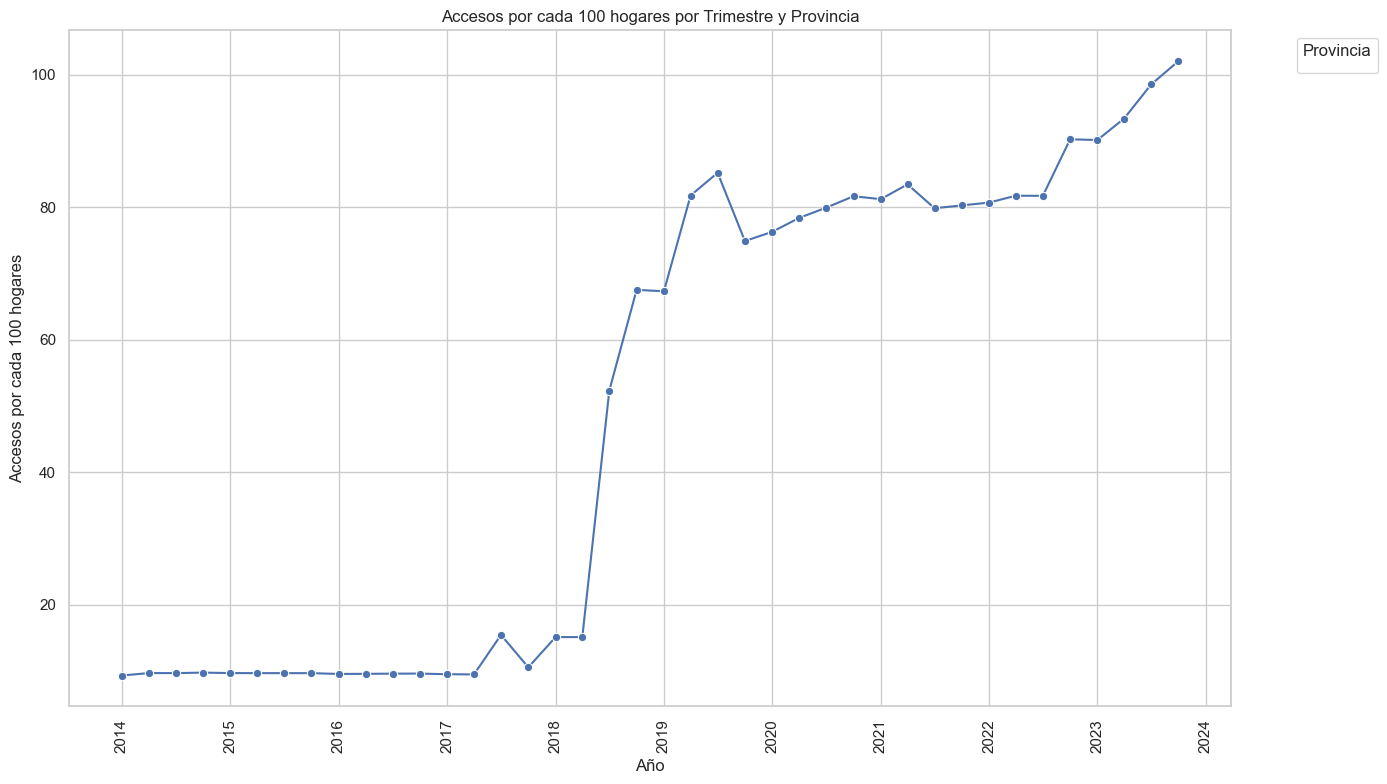

In [111]:
data_=data_pen_hog[data_pen_hog['Provincia']=='San Luis']
data_
# Aplicar la función para crear la columna 'Fecha'
data_['Fecha'] = data_.apply(convertir_a_date, axis=1)


# Crear la gráfica con Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_, x='Fecha', y='Accesos por cada 100 hogares', marker='o')

# Configurar la gráfica
plt.title('Accesos por cada 100 hogares por Trimestre y Provincia')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [112]:
data_.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Fecha
count,40.000000,40.000000,40.000000,40
mean,2018.500000,2.500000,49.509912,2018-11-15 15:36:00
min,2014.000000,1.000000,9.347208,2014-01-01 00:00:00
25%,2016.000000,1.750000,9.710401,2016-06-08 06:00:00
50%,2018.500000,2.500000,67.444196,2018-11-16 00:00:00
75%,2021.000000,3.250000,81.694609,2021-04-23 18:00:00
max,2023.000000,4.000000,102.070000,2023-10-01 00:00:00
std,2.908872,1.132277,36.485032,NaN


> el valor mas destacado de la tabla Terminaria siendo San Luis con un inicio de 9.34 y un cierre total de 102.07 al final del 2023

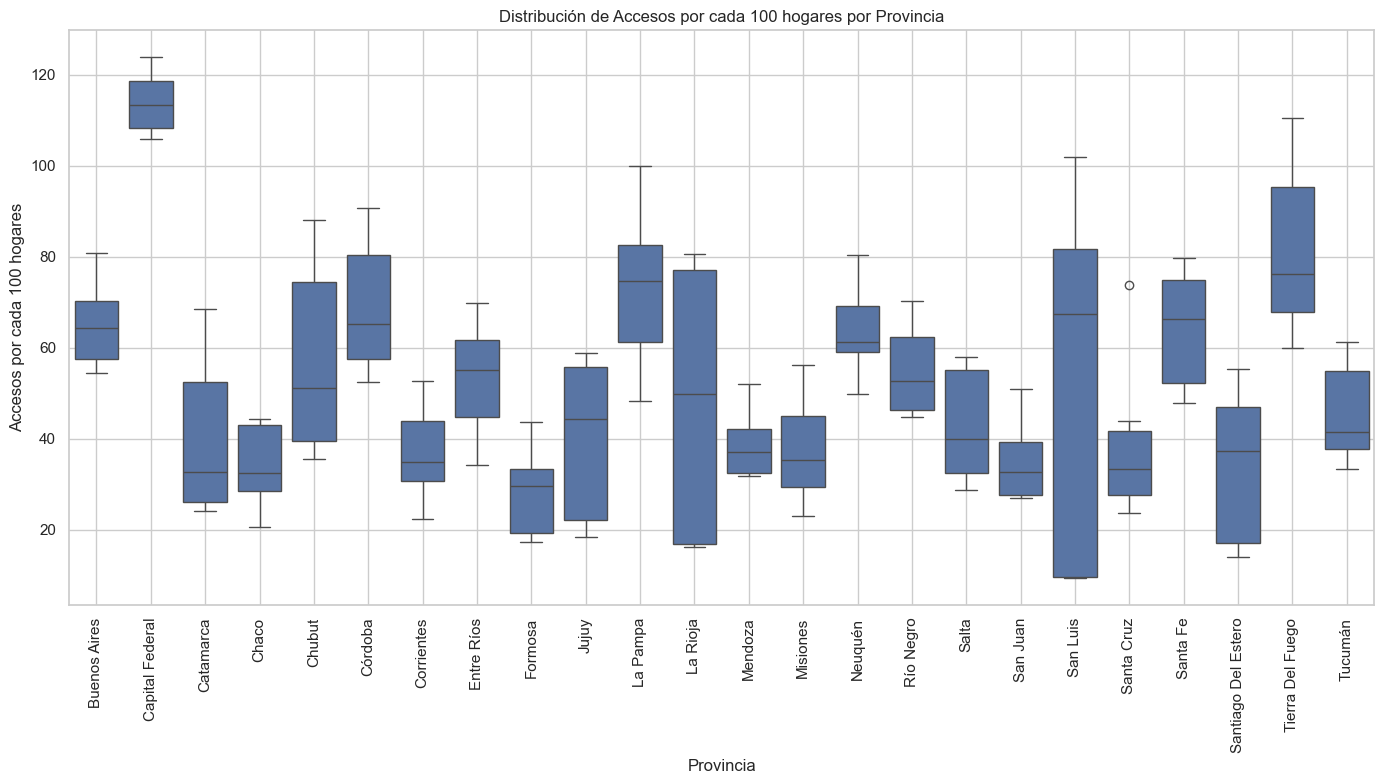

In [113]:
# Crear el boxplot con Seaborn
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_pen_hog, x='Provincia', y='Accesos por cada 100 hogares')

# Configurar la gráfica
plt.title('Distribución de Accesos por cada 100 hogares por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=90)
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> En el boxplot por provincia podemos detallar un poco mejor el volumen de los datos y podemos percibir un pequeño outlier en la provincia de Santa Cruz, en el cual maneja una media de 30

C:\Users\Rhamer\AppData\Local\Temp\ipykernel_11128\1304315984.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['Fecha'] = data_.apply(convertir_a_date, axis=1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


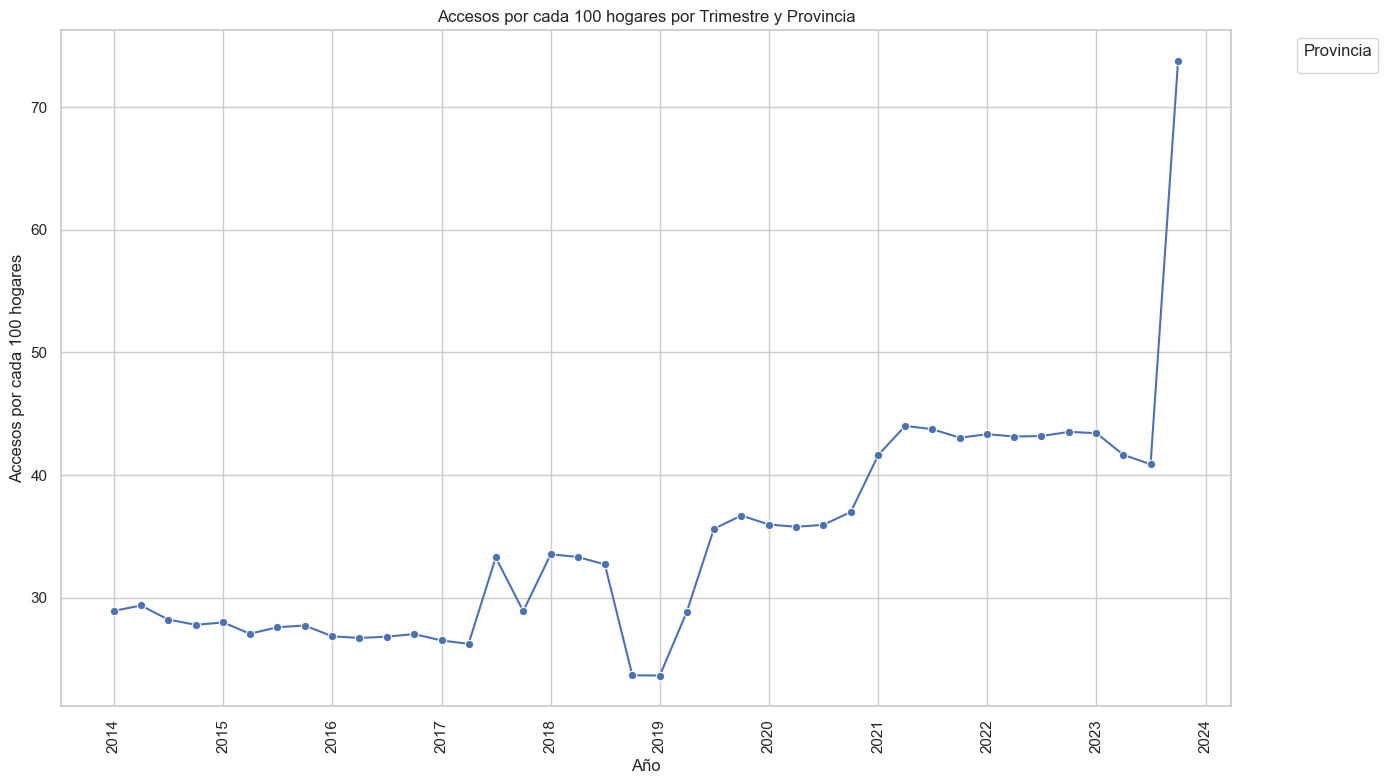

In [114]:
data_=data_pen_hog[data_pen_hog['Provincia']=='Santa Cruz']
data_


# Aplicar la función para crear la columna 'Fecha'
data_['Fecha'] = data_.apply(convertir_a_date, axis=1)


# Crear la gráfica con Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_, x='Fecha', y='Accesos por cada 100 hogares', marker='o')

# Configurar la gráfica
plt.title('Accesos por cada 100 hogares por Trimestre y Provincia')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [115]:
data_.describe()


,Año,Trimestre,Accesos por cada 100 hogares,Fecha
count,40.000000,40.000000,40.000000,40
mean,2018.500000,2.500000,34.637161,2018-11-15 15:36:00
min,2014.000000,1.000000,23.667655,2014-01-01 00:00:00
25%,2016.000000,1.750000,27.710092,2016-06-08 06:00:00
50%,2018.500000,2.500000,33.312097,2018-11-16 00:00:00
75%,2021.000000,3.250000,41.650873,2021-04-23 18:00:00
max,2023.000000,4.000000,73.750000,2023-10-01 00:00:00
std,2.908872,1.132277,9.255589,NaN


> Para Santa Cruz se puede observar que los datos manejan una media de 34.63 durante el resto de los años, sin embargo en el ultimo trimestre  del 2023 alcanza un pico historico de 73.75, superando por mucho los valores obtenido en años anteriores.

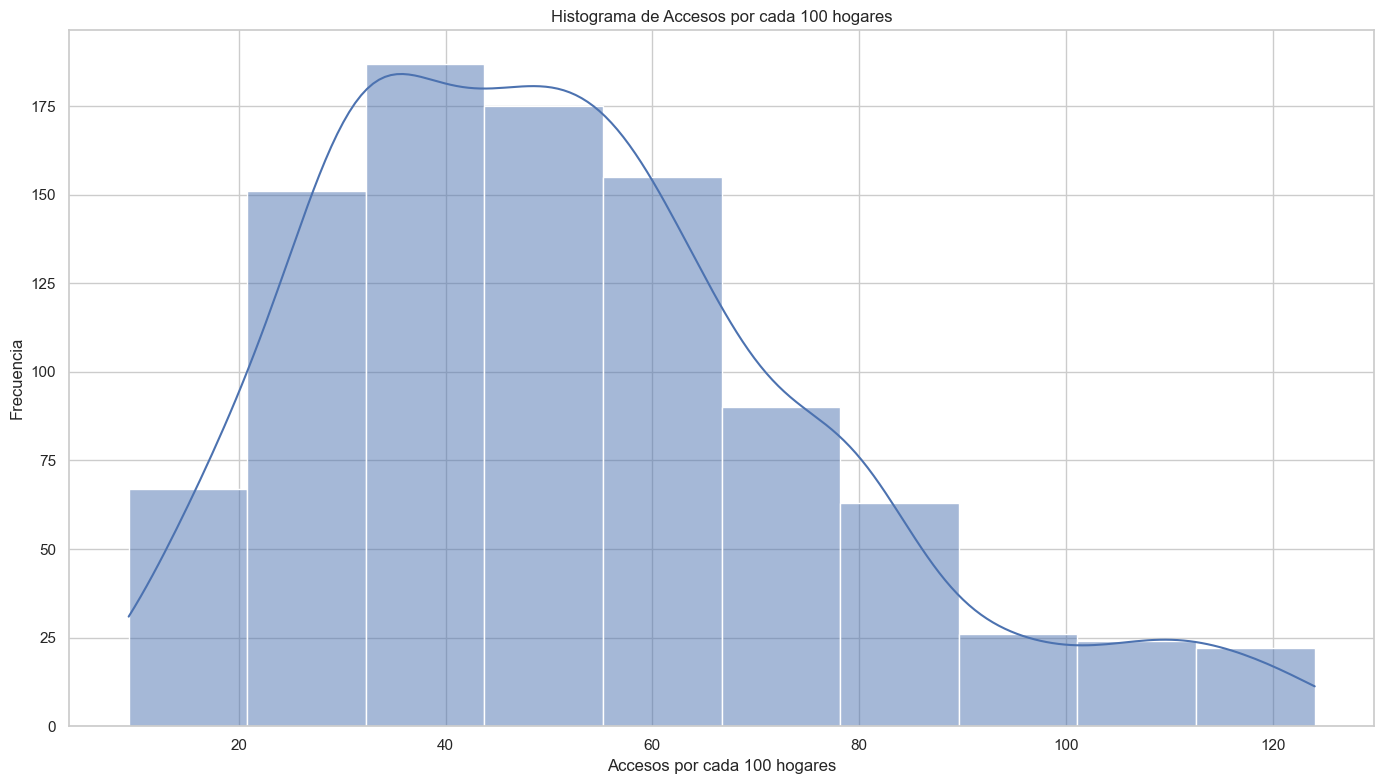

In [116]:
# Crear el histograma con Seaborn
plt.figure(figsize=(14, 8))
sns.histplot(data=data_pen_hog, x='Accesos por cada 100 hogares', bins=10, kde=True)

# Configurar la gráfica
plt.title('Histograma de Accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> se puede observar una distribución normal en el histograma actual, indicando que en la mayoria de las provincias de Argentina se manejaria un promedio de 38 a 40.

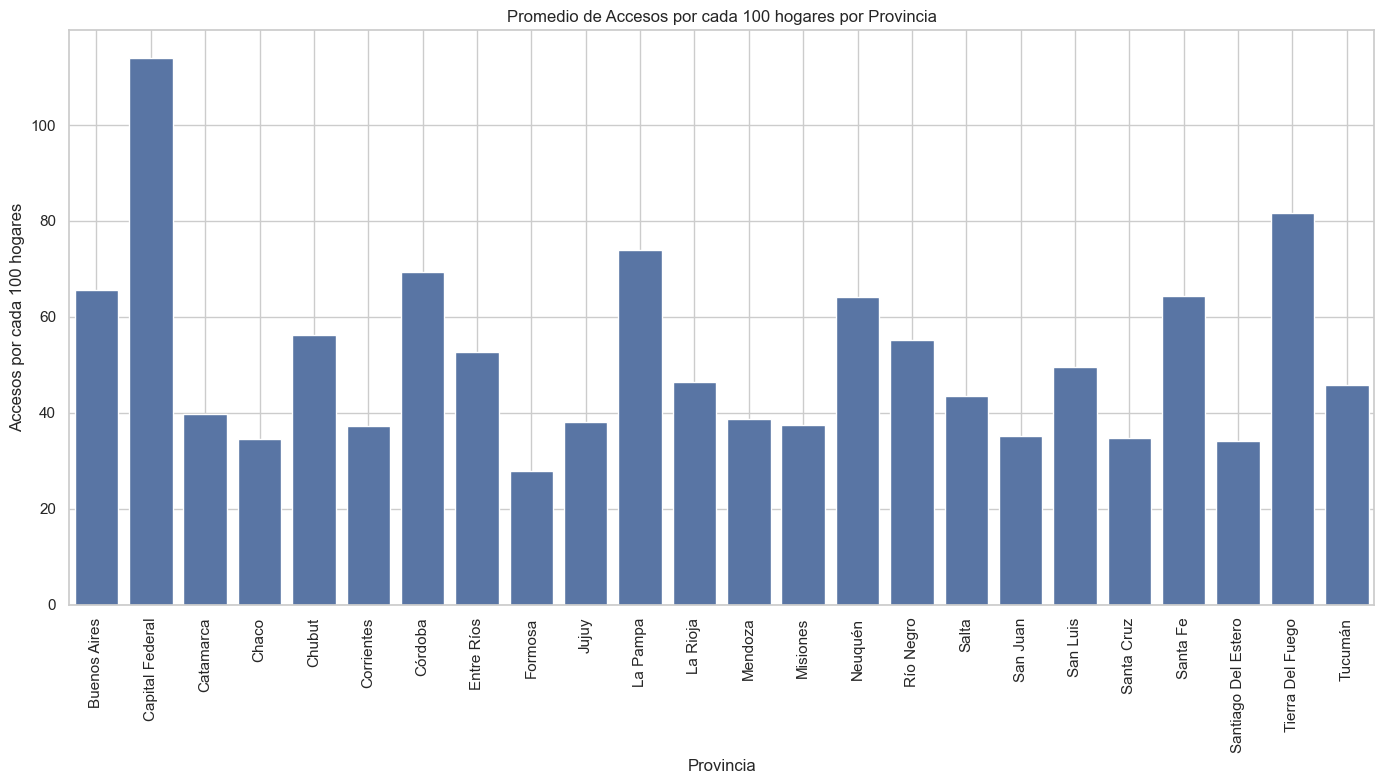

In [117]:
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=data_pen_hog.groupby('Provincia').mean().reset_index(), x='Provincia', y='Accesos por cada 100 hogares')

# Configurar la gráfica
plt.title('Promedio de Accesos por cada 100 hogares por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=90)
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> Mediante el grafico de Barras se puede detallar mejor cuales son las provincias que manejan estos valores al final del cierre del 2023, siendo la Capital Federal por mucho con un pico maximo de 124.06 y manteniendo una media de 114.06.

## evaluacion de data_vel_por_prov

In [125]:
data_acc_por_tec

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0
...,...,...,...,...,...,...,...,...,...
957,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
958,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
959,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
data_acc_por_tec = data_acc_por_tec.dropna()

In [142]:
data_acc_por_tec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           960 non-null    object 
 1   Trimestre     960 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total         960 non-null    float64
dtypes: float64(6), object(3)
memory usage: 75.0+ KB


In [129]:
data_acc_por_tec.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,9.600000e+02,9.600000e+02,9.600000e+02,960.00000,960.000000,9.600000e+02
mean,1.171007e+05,1.816350e+05,4.428212e+04,12071.28750,6451.996875,3.615411e+05
std,2.411026e+05,4.461057e+05,1.681546e+05,20544.30774,11192.518329,7.778954e+05
min,3.296000e+03,0.000000e+00,0.000000e+00,0.00000,2.000000,1.255700e+04
25%,2.123025e+04,1.054450e+04,3.470000e+02,676.00000,330.000000,5.900025e+04
50%,4.547550e+04,3.967000e+04,2.541000e+03,4947.00000,1881.000000,1.111385e+05
75%,9.190500e+04,7.549325e+04,2.347675e+04,13694.25000,7278.750000,1.883518e+05
max,1.586343e+06,2.797700e+06,1.784593e+06,138405.00000,73415.000000,5.011620e+06


In [133]:
data_total_acc_por_tec

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
1,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
2,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023
3,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023
4,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
5,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
6,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
7,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
8,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021
9,2021,3,1950631,5826257,1566048,492415,250190,10085541,Jul-Sept 2021


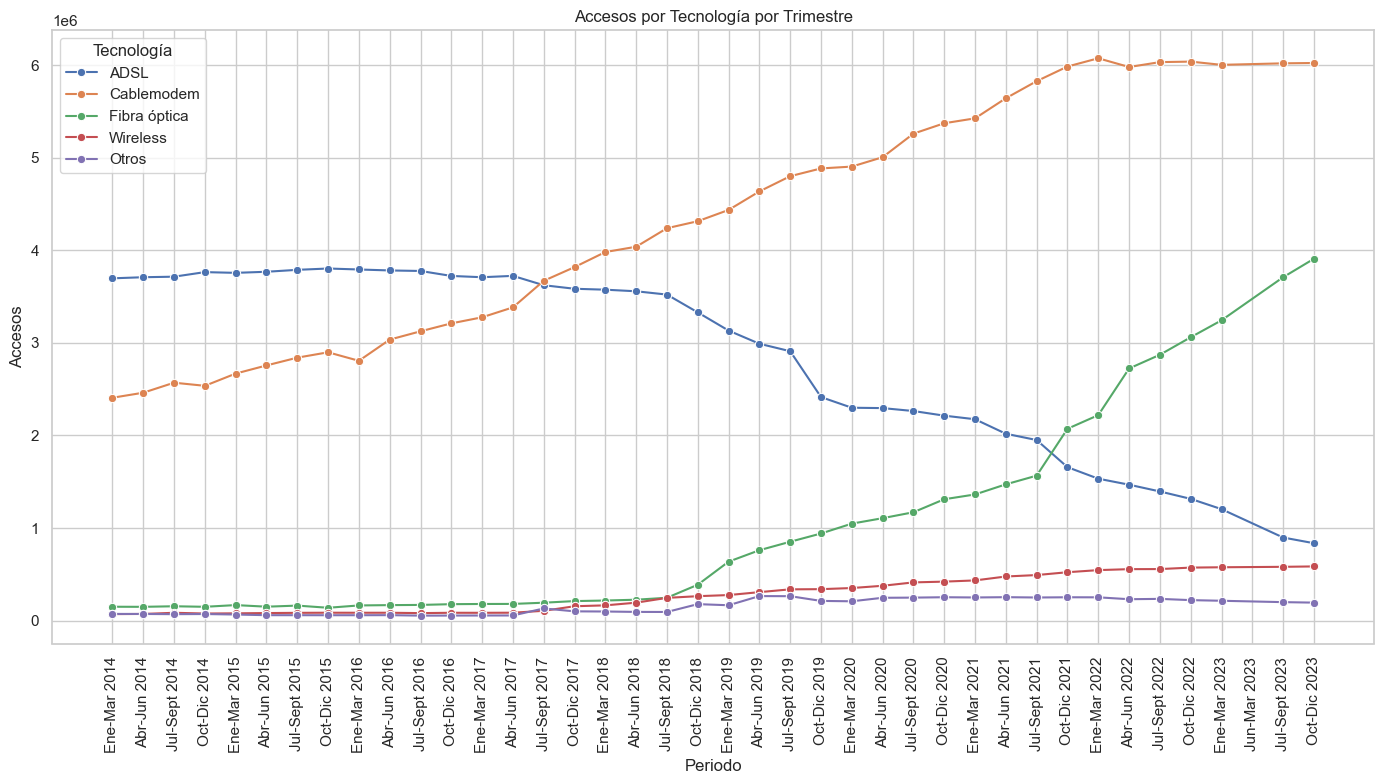

In [131]:
# Transformar el DataFrame a formato largo
df_melt = data_total_acc_por_tec.melt(id_vars=['Año', 'Trimestre', 'Periodo'], value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'], var_name='Tecnología', value_name='Accesos')

# Ordenar el DataFrame por el período en orden ascendente
df_melt['Periodo'] = pd.Categorical(df_melt['Periodo'], categories=df['Periodo'][::-1], ordered=True)

# Crear la gráfica con Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melt, x='Periodo', y='Accesos', hue='Tecnología', marker='o')

# Configurar la gráfica
plt.title('Accesos por Tecnología por Trimestre')
plt.xlabel('Periodo')
plt.ylabel('Accesos')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Tecnología')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> Para el grafico de la los tipos de tecnologias por provincia se puede notar que para el incio del año 2014 se la tecnologia de ADSL era quien mayor demanda mantenia en ese momento pero manenia una medida sostenida, mientras que cablemodem se mantenia de en segundo plano pero con una una pendiente que indicaba un aumento a lo largo del tiempo, esto hasta el 2017 que seria la fecha en donde las linas de progrecion temporal de cada tecnologia llegan a cruzarse es donde se nota que ADSL inicia su descenso, de manera vertiginosa. per lo realmente relevante en este punto es que mediante este mismo grafico se puede observar una correlacion inversamente proporcional existente entre las tecnologias, ya que a medida que una va en aumento y esta alcanza cierto punto el resto empieza a descender, lo que llevaria a considerar el comportamiento que tenido la tecnologia de -------------Fibra optica------------- durante el segunto y el cuarto trimestre del 2018, en el cual demuestra un crecimiento exponencia aun mayor que la del Cablemodem.

Año	Trimestre	Provincia	ADSL	Cablemodem	Fibra óptica	Wireless	Otros	Total

In [144]:
# Transformar el DataFrame a formato largo
df_melt = data_acc_por_tec.melt(id_vars=['Año', 'Trimestre', 'Provincia'], value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total'], var_name='Tecnología', value_name='Accesos')

# Ordenar el DataFrame por el período en orden ascendente
df_melt['Provincia'] = pd.Categorical(df_melt['Provincia'], categories=data_acc_por_tec['Provincia'][::-1], ordered=True)

# Crear la gráfica con Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melt, x='Provincia', y='Accesos', hue='Tecnología', marker='o')

# Configurar la gráfica
plt.title('Accesos por Tecnología por Trimestre')
plt.xlabel('Periodo')
plt.ylabel('Accesos')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Tecnología')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

ValueError: Categorical categories must be unique

Año	Trimestre	Provincia	ADSL	Cablemodem	Fibra óptica	Wireless	Otros	Total

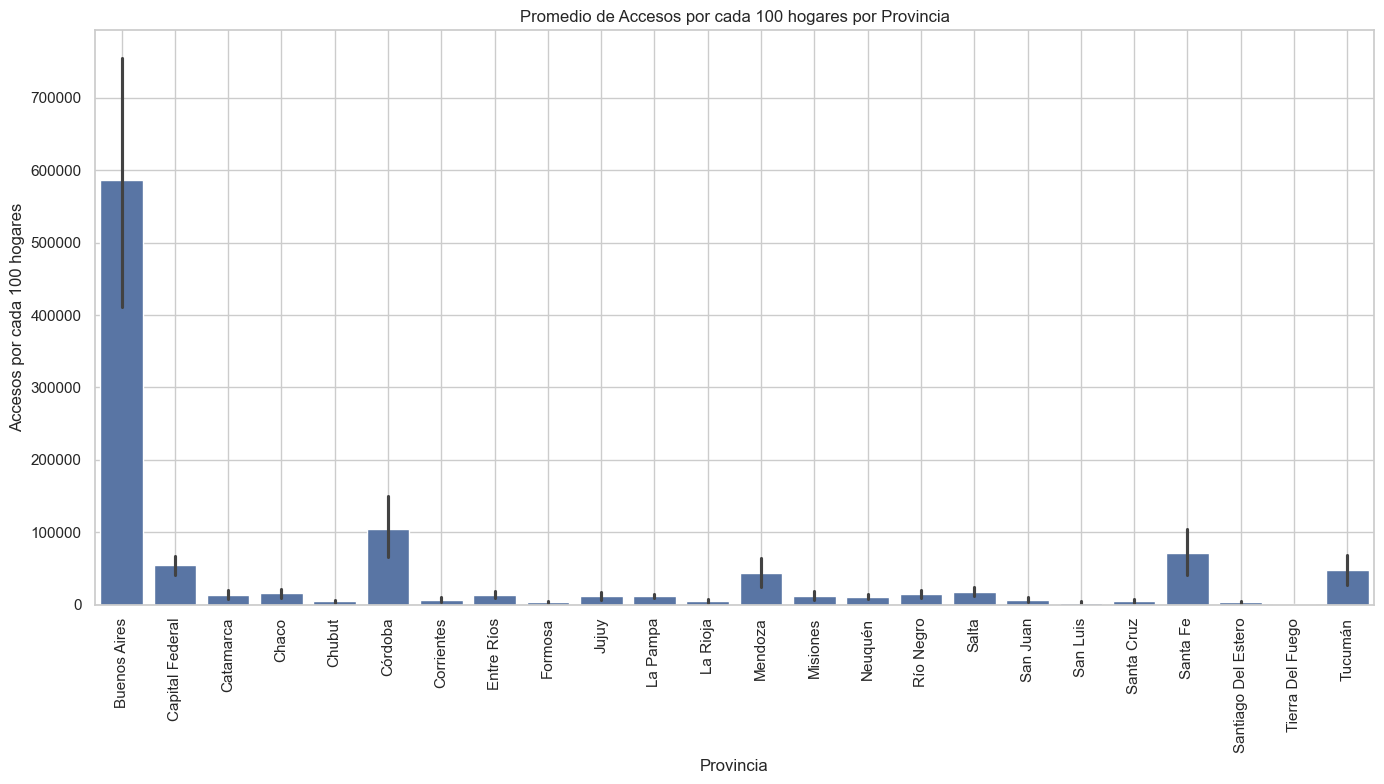

In [155]:
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=data_acc_por_tec, x='Provincia', y='Fibra óptica')

# Configurar la gráfica
plt.title('Promedio de Accesos por cada 100 hogares por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=90)
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

<p> Sin embargo se puede visualizar la ausencia de conexiones de <strong> Fibra optica </strong> en la mayoria de las provincias concentrandose en su mayoria solamente en Buenos Aires, lo que haria suponer que posiblemente sea un problema de infraestructura la ausencia de conexiones de fibra en las diferentes provincias al rededor del pais.